<a href="https://colab.research.google.com/github/raha86/K_Means_Clustering_Mall_customers/blob/main/K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
# **Content**
This dataset is designed for learning customer segmentation concepts, such as **market basket analysis**. It includes basic customer data such as **Customer ID, age, gender, annual income**, and **spending score**, which is assigned based on customer behavior and purchasing data.

## **Problem Statement**
The goal is to help a supermarket mall owner understand their customers better, identify target customers who are likely to converge, and provide insights to the marketing team for strategic planning.


In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration**

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/ML Notebooks/K_Means_Clustering_Mall_Customers/Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#removing unnecessary columns i.e- 'customer id'
customers.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
#checking for null values
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## **Checking the Distribution of Variables**

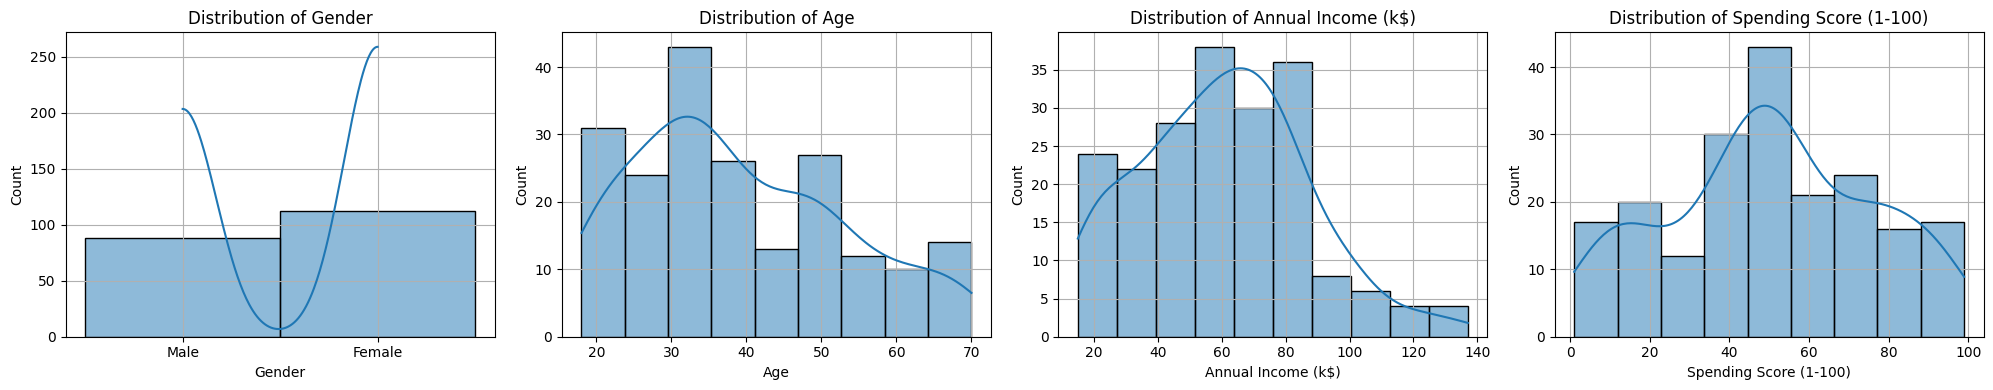

In [ ]:
# Set number of plots per row
plots_per_row = 5
total_cols = len(customers.columns)
rows = (total_cols + plots_per_row - 1) // plots_per_row  # calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(5 * plots_per_row, 4 * rows))

# Flatten axes array (even if only one row)
axes = axes.flatten()

# Loop through each column
for idx, column in enumerate(customers.columns):
    sns.histplot(data=customers, x=column, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].grid(True)

# Hide any unused plots (if number of columns isn't exactly divisible by 3)
for i in range(len(customers.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = customers.select_dtypes(include=['number']).columns
numeric_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## **Checking the Outliers**

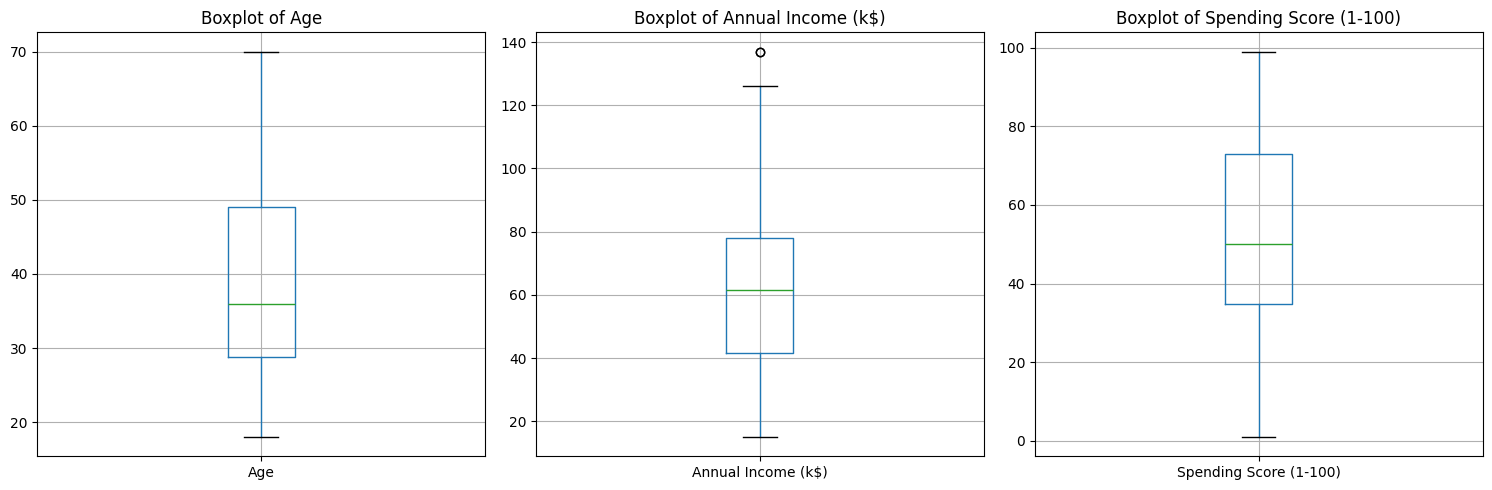

In [ ]:
# Select only numerical columns
numeric_cols = customers.select_dtypes(include=['number']).columns

# Set up subplots
n_cols = 5  # number of plots per row (adjust as you like)
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's a 2D array

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    customers.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Label Encoding**

In [ ]:
object_col = customers.select_dtypes(include=['object']).columns
object_col

Index(['Gender'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in object_col:
  customers[col] = le.fit_transform(customers[col])

In [ ]:
customers.dtypes

,0
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
X = customers.values
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

## **Use WCSS to find the optimal k value**

In [ ]:
from sklearn.cluster import KMeans

wcss = []

# for k in range(1, 5):   as this range is not giving a good elbow pattern , we'll try some more value
for k in range(1, 9):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
 # inertia variable stores the calculated value of wcss for each k value
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[308862.06000000006,
 221136.4418859649,
 158794.2215016297,
 104414.67534220174,
 97260.4789301898,
 68324.82243305087,
 51496.86065374506,
 44687.23553400544]

Text(0, 0.5, 'WCSS')

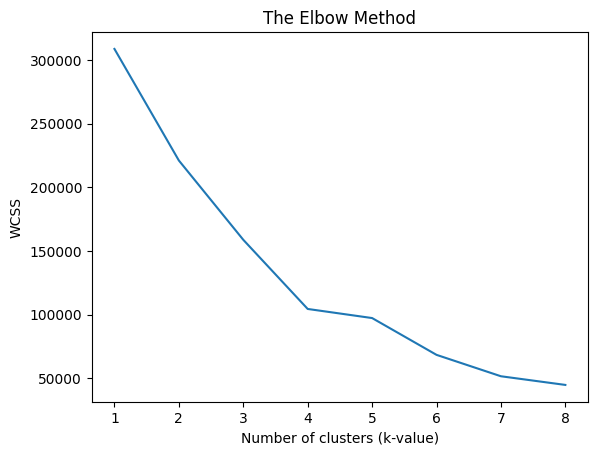

In [ ]:
#plotting wcss vs k value
# plt.plot(range(1, 5), wcss)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k-value)')
plt.ylabel('WCSS')

***At k = 4 the ELBOW of the curve is located, so it will be our optimal k value***

## **Model Building**

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
y = kmeans.predict(X)

In [ ]:
y_df = pd.DataFrame(y, columns=['Cluster Number'])

In [ ]:
final_df = pd.concat([customers, y_df], axis = 1)
final_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


Text(0.5, 1.0, 'Data Points Distribution in Clusters')

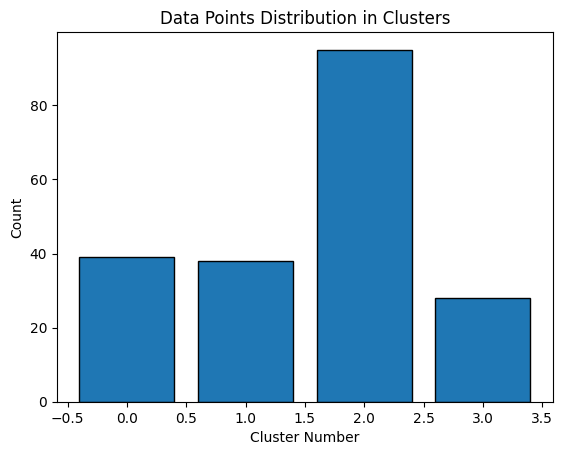

In [ ]:
plt.bar(final_df['Cluster Number'].unique(), final_df['Cluster Number'].value_counts(), edgecolor='black')
plt.xlabel('Cluster Number')
plt.ylabel('Count')
plt.title('Data Points Distribution in Clusters')

# **Interpretation**

In [ ]:
final_df.groupby('Cluster Number').describe().T

Cluster Number                        0           1          2           3
Gender                 count  95.000000   39.000000  28.000000   38.000000
                       mean    0.378947    0.461538   0.500000    0.526316
                       std     0.487699    0.505035   0.509175    0.506009
                       min     0.000000    0.000000   0.000000    0.000000
                       25%     0.000000    0.000000   0.000000    0.000000
                       50%     0.000000    0.000000   0.500000    1.000000
                       75%     1.000000    1.000000   1.000000    1.000000
                       max     1.000000    1.000000   1.000000    1.000000
Age                    count  95.000000   39.000000  28.000000   38.000000
                       mean   44.894737   32.692308  24.821429   40.394737
                       std    15.341831    3.728650   5.571446   11.376931
                       min    18.000000   27.000000  18.000000   19.000000
                       25%    32.000000   30.000000  20.750000   34.000000
                       50%    48.000000   32.000000  23.000000   41.500000
                       75%    56.000000   35.500000  30.000000   47.000000
                       max    70.000000   40.000000  35.000000   59.000000
Annual Income (k$)     count  95.000000   39.000000  28.000000   38.000000
                       mean   48.705263   86.538462  28.714286   87.000000
                       std    14.522817   16.312485  10.384665   16.271348
                       min    16.000000   69.000000  15.000000   70.000000
                       25%    40.000000   75.500000  19.750000   76.250000
                       50%    54.000000   79.000000  28.000000   80.000000
                       75%    61.000000   95.000000  37.250000   96.000000
                       max    69.000000  137.000000  48.000000  137.000000
Spending Score (1-100) count  95.000000   39.000000  28.000000   38.000000
                       mean   42.631579   82.128205  74.250000   18.631579
                       std    14.713616    9.364489  14.075524   10.915947
                       min     3.000000   63.000000  39.000000    1.000000
                       25%    40.500000   74.500000  64.000000   10.250000
                       50%    47.000000   83.000000  74.000000   16.500000
                       75%    52.000000   90.000000  81.250000   26.750000
                       max    60.000000   97.000000  99.000000   40.000000

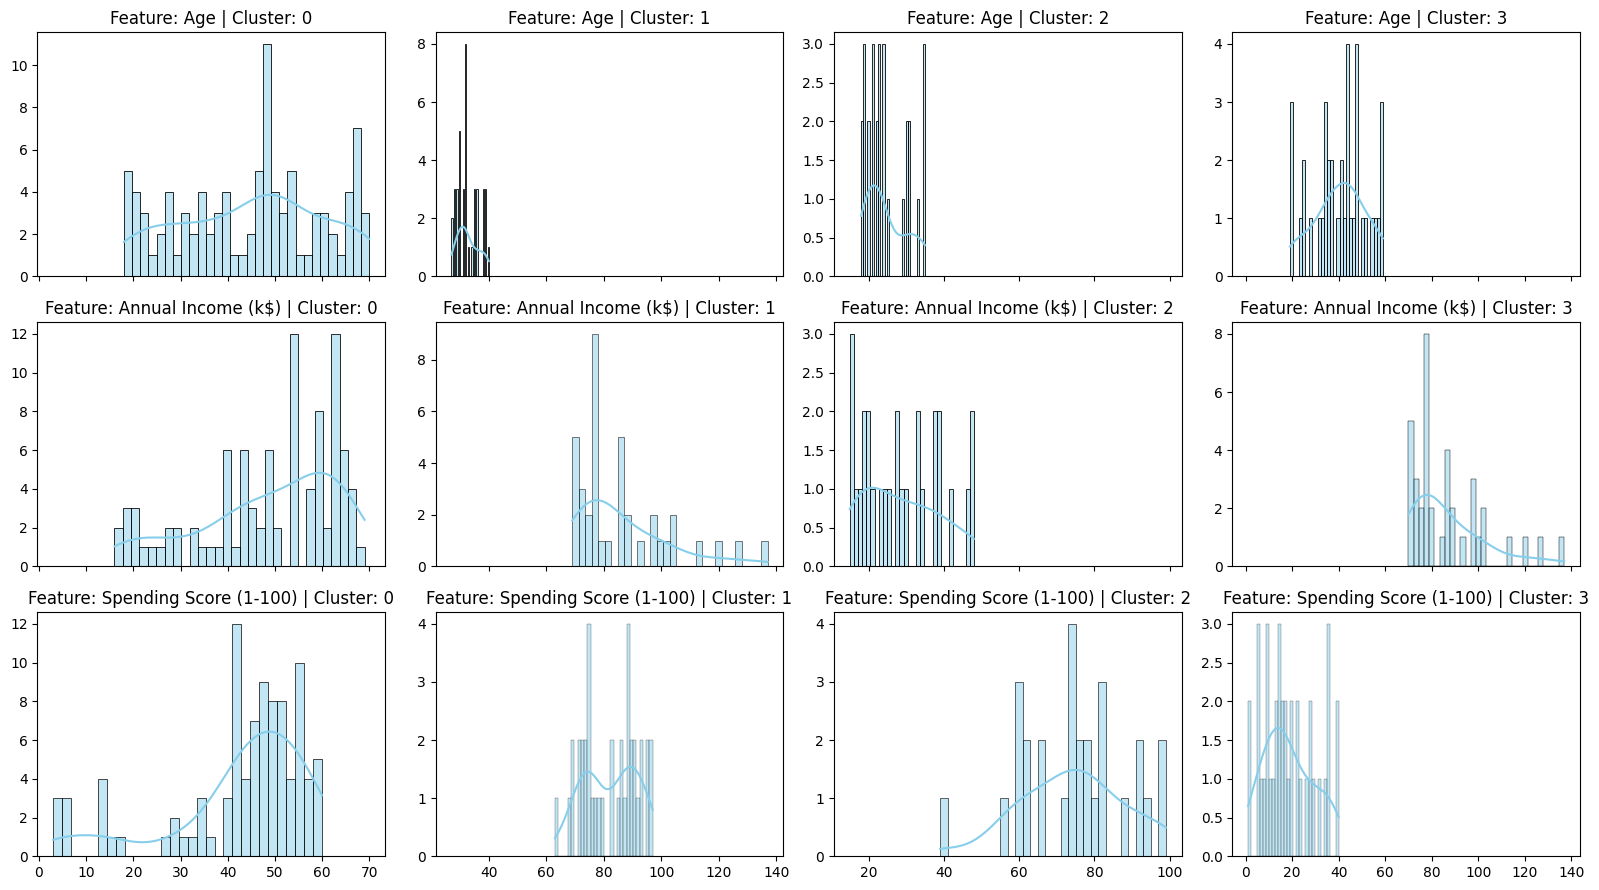

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
clusters = sorted(final_df['Cluster Number'].unique())

n_rows = len(features)
n_cols = len(clusters)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), sharex='col')

# If axes is 1D (for 1 row or 1 column), make sure it's 2D for consistency
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if n_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        ax = axes[i, j]
        subset = final_df[final_df['Cluster Number'] == cluster]
        sns.histplot(subset[feature], bins=30, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Feature: {feature} | Cluster: {cluster}')
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()


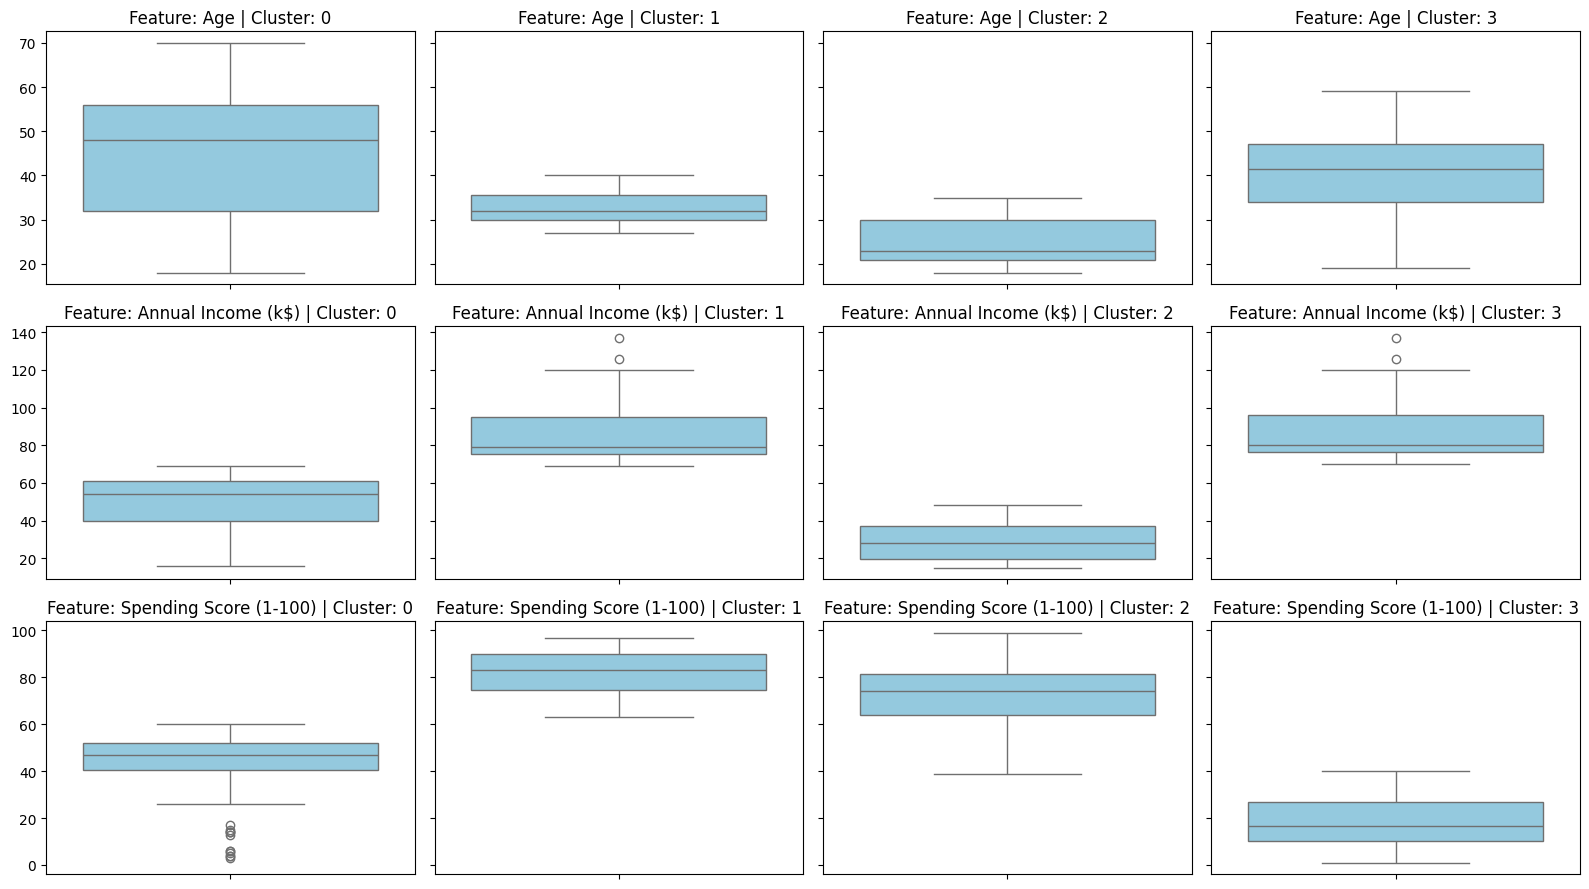

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
clusters = sorted(final_df['Cluster Number'].unique())

n_rows = len(features)
n_cols = len(clusters)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), sharey='row')

# If axes is 1D (for 1 row or 1 column), make sure it's 2D for consistency
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if n_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        ax = axes[i, j]
        subset = final_df[final_df['Cluster Number'] == cluster]
        sns.boxplot(subset[feature], color='skyblue', ax=ax)
        ax.set_title(f'Feature: {feature} | Cluster: {cluster}')
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

## **1. cluster 0:**
* Most of the persons are in the age of range 32 to 60 with a mean of 45.
* Most of the persons' Annual income ranges from 40k to 65k with a mean of 49k.
* Most of the persons have spending score of 40 to 55, but the mean drops to 42 as many of the has 0 spending score.

## **2. cluster 1:**
* Most of the persons are in the age of range 30 to 35 with a mean of around 33.
* Most of the persons' Annual income ranges from 75k to 95k with a mean of 79k.
* Most of the persons have spending score of 75 to 95 with a mean of 82.

## **3. cluster 2:**
* Most of the persons are in the age of range 20 to 30 with a mean of around 25.
* Most of the persons' Annual income ranges from 20k to 37k with a mean of 29k.
* Most of the persons have spending score of 64 to 81 with a mean of 74.

## **4. cluster 3:**
* Most of the persons are in the age of range 34 to 47 with a mean of around 42.
* Most of the persons' Annual income ranges from 76k to 96k with a mean of 87k.
* Most of the persons have spending score of 10 to 27 with a mean of 19.